### 1. Base Q-Network and DQN Agent

#### 1.1 Introduction
The initial approach to solving the stock trading problem involves implementing a basic Deep Q-Network (DQN). This section describes the foundational aspects of the DQN model, including its architecture, training procedure, and evaluation metrics.

#### 1.2 Deep Q-Network (DQN) Model

**Model Architecture:**
The DQN model consists of a neural network with three fully connected layers. The input to the network is the state representation of the environment, and the output is the Q-value for each possible action. The network architecture is as follows:
- **Input Layer:** Takes the state vector of dimension `state_dim`.
- **First Hidden Layer:** Fully connected layer with 64 neurons and ReLU activation.
- **Second Hidden Layer:** Fully connected layer with 64 neurons and ReLU activation.
- **Output Layer:** Fully connected layer with `action_dim` neurons, representing the Q-values for each action.

**Model Formulation:**
The forward pass through the network is defined by the following equations:

```
h_1 = ReLU(W_1 * s + b_1)
```

```
h_2 = ReLU(W_2 * h_1 + b_2)
```

```
Q(s, a) = W_3 * h_2 + b_3
```

where:
- `s` is the state input,
- `W_1, W_2, W_3` are the weight matrices,
- `b_1, b_2, b_3` are the bias vectors,
- `h_1, h_2` are the activations of the hidden layers.

#### 1.3 Training Procedure

The DQN agent is trained using the following steps:

1. **Experience Replay:** The agent stores its experiences $(s, a, r, s', d)$ in a replay buffer. During training, a random mini-batch of experiences is sampled from this buffer to break the temporal correlations and improve learning stability.

2. **Target Network:** A separate target network is used to generate target Q-values for training. This target network is periodically updated with the weights of the main network to stabilize training.

3. **Bellman Equation:** The DQN agent updates its Q-values using the Bellman equation. The loss function is defined as the mean squared error between the predicted Q-values and the target Q-values:


$L(θ) = E[(r + γ max_a' Q'(s', a'; θ^-) - Q(s, a; θ))^2]$


where:
- `θ` are the parameters of the main network,
- `θ^-` are the parameters of the target network,
- `γ` is the discount factor,
- `D` is the replay buffer.

4. **Optimization:** The agent uses  Adam to minimize the loss function and update the network parameters.

### 2. DQN with Modified Network Architecture

#### 2.1 Introduction
To improve the performance of the baseline DQN model, I introduce a modified network architecture. This section details the changes made to the original DQN architecture, the rationale behind these modifications, and the results obtained from this enhanced model.

#### 2.2 Modified Deep Q-Network (DQN) Model

**Model Architecture:**
The modified DQN model increases the depth and complexity of the network by adding more layers and neurons. The architecture consists of five fully connected layers, each with 128 neurons and ReLU activation functions. The architecture is as follows:
- **Input Layer:** Takes the state vector of dimension `state_dim`.
- **First Hidden Layer:** Fully connected layer with 128 neurons and ReLU activation.
- **Second Hidden Layer:** Fully connected layer with 128 neurons and ReLU activation.
- **Third Hidden Layer:** Fully connected layer with 128 neurons and ReLU activation.
- **Fourth Hidden Layer:** Fully connected layer with 128 neurons and ReLU activation.
- **Output Layer:** Fully connected layer with `action_dim` neurons, representing the Q-values for each action.

**Model Formulation:**
The forward pass through the modified network is defined by the following equations:

```
h_1 = ReLU(W_1 * s + b_1)
```

```
h_2 = ReLU(W_2 * h_1 + b_2)
```

```
h_3 = ReLU(W_3 * h_2 + b_3)
```

```
h_4 = ReLU(W_4 * h_3 + b_4)
```

```
Q(s, a) = W_5 * h_4 + b_5
```

where:
- `s` is the state input,
- `W_1, W_2, W_3, W_4, W_5` are the weight matrices,
- `b_1, b_2, b_3, b_4, b_5` are the bias vectors,
- `h_1, h_2, h_3, h_4` are the activations of the hidden layers.

#### 2.3 Training Procedure

The training procedure for the modified DQN follows the same steps as the base DQN, with the changes being focused on the network architecture. Key steps include:

1. **Experience Replay:** The agent stores its experiences $(s, a, r, s', d)$ in a replay buffer and samples mini-batches during training to improve learning stability.

2. **Target Network:** A separate target network generates target Q-values, and its weights are periodically updated from the main network to stabilize training.

3. **Bellman Equation:** The modified DQN updates its Q-values using the Bellman equation, with the loss function defined as the mean squared error between predicted and target Q-values:


$L(θ) = E[(r + γ max_a' Q'(s', a'; θ^-) - Q(s, a; θ))^2]$


where:
- `θ` are the parameters of the main network,
- `θ^-` are the parameters of the target network,
- `γ` is the discount factor,
- `D` is the replay buffer.

4. **Optimization:** Adam is used to minimize the loss and update network parameters.

### 3. DQN with SGD Optimizer

#### 3.1 Introduction
In an effort to explore different optimization techniques, this section implements the Stochastic Gradient Descent (SGD) optimizer with momentum for training the DQN model. This change aims to investigate how a different optimization algorithm affects the performance of the agent in the stock trading environment.

#### 3.2 Stochastic Gradient Descent (SGD) Optimizer

**Optimizer Details:**
The SGD optimizer is a widely used optimization technique in machine learning, particularly for deep learning models. It updates the model parameters using the following update rule:


$θ = θ - η * ∇L(θ)$


where:
- `θ` are the model parameters,
- `η` is the learning rate,
- `∇L(θ)` is the gradient of the loss function with respect to the parameters.

To enhance the convergence speed and stability of the optimization, I use SGD with momentum. Momentum helps accelerate gradients vectors in the right directions, leading to faster converging. The update rule with momentum is:


$v_t = β * v_{t-1} + η * ∇L(θ)$



$θ = θ - v_t$


where:
- `v_t` is the velocity (update vector) at time step `t`,
- `β` is the momentum factor.

#### 3.3 Implementation

**Model Training:**
The DQN agent's optimizer is changed to SGD with a learning rate of 0.01 and a momentum of 0.9. The training procedure remains the same as the base DQN, but with the updated optimizer. This includes the experience replay, target network updates, and Bellman equation-based loss minimization.

```python
agent.optimizer = optim.SGD(agent.model.parameters(), lr=0.01, momentum=0.9)
```

### 4. DQN with Different Trade Actions

#### 4.1 Introduction
To enhance the decision-making capabilities of the DQN agent, I extend the action space to include additional trade actions. This section details the modifications to the environment to support more complex trading actions, the rationale behind these changes, and the results obtained from this enhanced model.

#### 4.2 Extended Action Space

**Extended Action Set:**
In the original environment, the action space consisted of three possible actions for each stock:
1. **Sell (0):** Sell all shares of the stock.
2. **Hold (1):** Hold the stock without any change.
3. **Buy (2):** Buy one share of the stock.

The extended action space adds a fourth action:
4. **Buy Half (3):** Buy half a share of the stock.

#### 4.3 Implementation

**Environment Modifications:**
The `MultiStockEnvExtended` class inherits from the original `MultiStockEnv` and modifies the `action_list` to include the new action (Buy Half). Additionally, the `_trade` method is updated to handle the new action appropriately.

```python
class MultiStockEnvExtended(MultiStockEnv):
    def __init__(self, data, initial_investment=CFG.INITIAL_INVESTMENT):
        super().__init__(data, initial_investment)
        self.action_list = list(map(list, itertools.product([0, 1, 2, 3], repeat=self.n_stock)))

    def _trade(self, action):
        action_vec = self.action_list[action]
        for i, a in enumerate(action_vec):
            if a == 0:
                self.cash_in_hand += self.stock_price[i] * self.stock_owned[i]
                self.stock_owned[i] = 0
            elif a == 2:
                self.stock_owned[i] += 1
                self.cash_in_hand -= self.stock_price[i]
            elif a == 3:
                self.stock_owned[i] += 0.5
                self.cash_in_hand -= self.stock_price[i] / 2
```

**Model Training:**
The DQN agent is trained using the extended environment, with the increased action space. The training pipeline remains the same, with the agent learning from experiences and updating its policy accordingly.

```python
train_env = MultiStockEnvExtended(train_data)
test_env = MultiStockEnvExtended(test_data)
agent = DQNAgent(state_dim, len(train_env.action_space))
dqn_pipeline(agent, "DQN with Different Trade Actions", train_env, test_env)
```

### 5. Double DQN

#### 5.1 Introduction

The Double Deep Q-learning Network (DDQN) is an enhancement of the standard DQN algorithm. It addresses the overestimation bias often encountered in Q-learning by decoupling the action selection and evaluation. This section explains the modifications introduced by the DDQN algorithm, the theoretical background, and the results obtained from applying this approach to the stock trading environment.

#### 5.2 Theoretical Background

**Overestimation Bias in Q-Learning:**
In standard Q-learning, the target value for the Q-function update is calculated using the maximum estimated Q-value for the next state:
$ Q(s, a) = r + \gamma \max_{a'} Q(s', a') $
This can lead to overestimation because the same network is used both to select and evaluate the next action.

**Double Q-Learning:**
Double Q-learning addresses this issue by using two separate estimations for action selection and evaluation. The Double DQN variant uses the main model to select the next action and the target model to evaluate this action:
$ Q(s, a) = r + \gamma Q_{\text{target}}(s', \arg\max_{a'} Q_{\text{main}}(s', a')) $

#### 5.3 Implementation

**Agent Modifications:**
The `DoubleDQNAgent` class inherits from `DQNAgent` and overrides the `replay` method to implement the Double DQN algorithm. The primary change is in how the target value is computed during experience replay.

```python
class DoubleDQNAgent(DQNAgent):
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(CFG.DEVICE)
            target = self.model(state)[0][action]
            if done:
                target = reward
            else:
                t = self.model(next_state).argmax(1).item()
                target = reward + self.gamma * self.target_model(next_state)[0][t]
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = F.mse_loss(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
```

**Training and Evaluation:**
The training and evaluation pipeline remains consistent with previous sections. The agent is trained using the extended `replay` method, and its performance is evaluated on both training and test environments.

```python
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Double DQN agent
agent = DoubleDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Double DQN (DDQN)", train_env, test_env)
```


### 6. Prioritized Experience Replay

#### 6.1 Introduction

Prioritized Experience Replay (PER) is a technique designed to improve the efficiency of experience replay in Deep Q-learning Networks (DQN). Instead of sampling experiences uniformly, PER samples experiences based on their temporal-difference (TD) error, prioritizing those with higher TD errors. This section covers the implementation of PER, the modifications made to the DQN agent, and the results of applying this approach to the stock trading environment.

#### 6.2 Theoretical Background

**Experience Replay:**
Experience replay helps break the correlation between consecutive experiences by storing them in a replay buffer and sampling randomly during training. However, not all experiences are equally valuable for learning. 

**Prioritized Experience Replay:**
In PER, experiences with higher TD errors (indicating more significant learning potential) are sampled more frequently. The probability of sampling an experience is proportional to its TD error raised to a power \(\alpha\):
\[ P(i) = \frac{|\delta_i|^\alpha}{\sum_k |\delta_k|^\alpha} \]
where \(\delta_i\) is the TD error for experience \(i\), and \(\alpha\) controls the level of prioritization.

#### 6.3 Implementation

**Agent Modifications:**
The `PrioritizedReplayDQNAgent` class inherits from `DQNAgent` and includes methods for managing priorities, sampling experiences based on their priorities, and updating priorities after learning steps.

```python
class PrioritizedReplayDQNAgent(DQNAgent):
    def __init__(self, state_dim, action_dim):
        super().__init__(state_dim, action_dim)
        self.memory = deque(maxlen=10000)
        self.priorities = deque(maxlen=10000)
        self.alpha = 0.6

    def remember(self, state, action, reward, next_state, done):
        max_priority = max(self.priorities, default=1.0)
        self.memory.append((state, action, reward, next_state, done))
        self.priorities.append(max_priority)

    def replay(self, batch_size):
        sample_indices = self._sample_proportional(batch_size)
        minibatch = [self.memory[idx] for idx in sample_indices]
        weights = [self._calculate_weight(idx) for idx in sample_indices]
        for idx, (state, action, reward, next_state, done) in zip(sample_indices, minibatch):
            state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(CFG.DEVICE)
            target = self.model(state)[0][action]
            if done:
                target = reward
            else:
                t = self.target_model(next_state).max(1)[0].item()
                target = reward + self.gamma * t
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = F.mse_loss(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
            self._update_priority(idx, loss.item())
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def _sample_proportional(self, batch_size):
        scaled_priorities = np.array(self.priorities) ** self.alpha
        sample_probabilities = scaled_priorities / sum(scaled_priorities)
        return np.random.choice(len(self.memory), batch_size, p=sample_probabilities)

    def _calculate_weight(self, idx):
        scaled_priorities = np.array(self.priorities) ** self.alpha
        sample_probabilities = scaled_priorities / sum(scaled_priorities)
        weight = (1 / (len(self.memory) * sample_probabilities[idx])) ** (1 - self.epsilon_decay)
        return weight

    def _update_priority(self, idx, priority):
        self.priorities[idx] = priority
```

**Training and Evaluation:**
The training and evaluation pipeline remains consistent with previous sections. The agent is trained using the prioritized replay buffer, and its performance is evaluated on both training and test environments.

```python
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Prioritized Replay DQN agent
agent = PrioritizedReplayDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Prioritized Experience Replay", train_env, test_env)
```


### 7. Dueling DQN

#### 7.1 Introduction

Dueling DQN is an enhancement of the traditional DQN architecture that separates the estimation of state values and advantages for each action. This approach allows the agent to learn which states are valuable without needing to evaluate all possible actions for each state. This section covers the implementation of the Dueling DQN model, the modifications made to the DQN agent, and the results of applying this approach to the stock trading environment.

#### 7.2 Theoretical Background

**Dueling DQN Architecture:**
In the Dueling DQN architecture, the Q-network is split into two streams: one for calculating the state value function $V(s)$ and another for calculating the advantage function $A(s, a)$. The combined Q-value is computed as:
$Q(s, a) = V(s) + \left(A(s, a) - \frac{1}{|\mathcal{A}|}\sum_{a'} A(s, a')\right) $
where $ \mathcal{A} $ is the set of possible actions. This structure helps the network learn the value of states more effectively by reducing the noise from the less relevant actions.

#### 7.3 Implementation

**Model Definition:**
The `DuelingDQN` class defines the architecture with separate fully connected layers for the value and advantage streams.

```python
class DuelingDQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.value_fc = nn.Linear(128, 1)
        self.advantage_fc = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        value = self.value_fc(x)
        advantage = self.advantage_fc(x)
        return value + (advantage - advantage.mean())
```

**Training and Evaluation:**
The agent is modified to use the Dueling DQN model. The training and evaluation pipeline remains consistent with previous sections.

```python
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Dueling DQN agent
agent = DQNAgent(state_dim, action_dim)
agent.model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
agent.target_model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
dqn_pipeline(agent, "Dueling DQN", train_env, test_env)
```


### 8. Enhancing Exploration with Noisy Networks

#### 8.1 Introduction

Noisy Networks for exploration provide a way to enhance the exploration capabilities of reinforcement learning agents. This approach replaces the traditional exploration strategy, such as epsilon-greedy, with a network that includes noise in its parameters, allowing the agent to explore the action space more effectively.

#### 8.2 Theoretical Background

**Noisy Networks:**
Noisy Networks add parameterized noise to the weights of certain layers in the network. During training, this noise helps the agent explore different actions by perturbing the Q-values. The noise is sampled from a distribution (typically Gaussian) and added to the weights and biases of the layers.

#### 8.3 Implementation

**Noisy Linear Layer:**
The `NoisyLinear` class implements a linear layer with added noise.

```python
class NoisyLinear(nn.Module):
    def __init__(self, in_features, out_features, std_init=0.5):
        super(NoisyLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.std_init = std_init
        self.weight_mu = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.weight_sigma = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.register_buffer('weight_epsilon', torch.FloatTensor(out_features, in_features))
        self.bias_mu = nn.Parameter(torch.FloatTensor(out_features))
        self.bias_sigma = nn.Parameter(torch.FloatTensor(out_features))
        self.register_buffer('bias_epsilon', torch.FloatTensor(out_features))
        self.reset_parameters()
        self.reset_noise()

    def reset_parameters(self):
        mu_range = 1 / np.sqrt(self.in_features)
        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(self.std_init / np.sqrt(self.in_features))
        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(self.std_init / np.sqrt(self.in_features))

    def reset_noise(self):
        self.weight_epsilon.normal_()
        self.bias_epsilon.normal_()

    def forward(self, x):
        if self.training:
            weight = self.weight_mu + self.weight_sigma * self.weight_epsilon
            bias = self.bias_mu + self.bias_sigma * self.bias_epsilon
        else:
            weight = self.weight_mu
            bias = self.bias_mu
        return F.linear(x, weight, bias)
```

**Noisy DQN Model:**
The `NoisyDQN` class incorporates the noisy linear layers into the DQN architecture.

```python
class NoisyDQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(NoisyDQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = NoisyLinear(128, 128)
        self.fc3 = NoisyLinear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
```

**Training and Evaluation:**
The agent is modified to use the Noisy DQN model. The training and evaluation pipeline remains consistent with previous sections.

```python
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Noisy DQN agent
agent = DQNAgent(state_dim, action_dim)
agent.model = NoisyDQN(state_dim, action_dim).to(CFG.DEVICE)
agent.target_model = NoisyDQN(state_dim, action_dim).to(CFG.DEVICE)
dqn_pipeline(agent, "Enhancing Exploration with Noisy Networks", train_env, test_env)
```


### 9. Combined Approaches

#### 9.1 Introduction

Combining different approaches in reinforcement learning can lead to agents that benefit from the strengths of each approach. In this section, I combined prior approaches, such as Dueling DQN and Prioritized Experience Replay, to create a more powerful agent.

#### 9.2 Combined Approach

**CombinedDQNAgent:**
The `CombinedDQNAgent` class combines the Dueling DQN architecture with the Prioritized Experience Replay mechanism.

```python
class CombinedDQNAgent(PrioritizedReplayDQNAgent):
    def __init__(self, state_dim, action_dim):
        super().__init__(state_dim, action_dim)
        self.model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
        self.target_model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
        self.update_target_model()
```

#### 9.3 Training and Evaluation

The training and evaluation setup for the combined agent remains similar to previous sections. I initialize the environment and agent, then train the agent using the `dqn_pipeline` function.

```python
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Combined DQN agent
agent = CombinedDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Combining Approaches", train_env, test_env)
```


# Import libraries

In [1]:
import numpy as np
import random
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt


# Define configurations

In [2]:
class CFG:
    """
    Configuration class for the project.

    Attributes:
    N_EPISODE (int): Number of episodes.
    DEVICE (torch.device): Device to use for computation (cuda if available, else cpu).
    DATA_PATH (str): Path to the data file.
    TRAIN_RATIO (float): Ratio of data to use for training.
    BATCH_SIZE (int): Batch size for training.
    INITIAL_INVESTMENT (int): Initial investment amount.
    """
    
    N_EPISODE = 300
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    DATA_PATH = "Stocks.csv"
    TRAIN_RATIO = 0.5
    BATCH_SIZE=32
    INITIAL_INVESTMENT = 20000

# Load Data

In [3]:

# Load the data
data = pd.read_csv(CFG.DATA_PATH)
data = data.values

# Train-test split
train_size = int(CFG.TRAIN_RATIO * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Define ENV

In [4]:

# Define the MultiStockEnv class
class MultiStockEnv:
    """
    Environment for a multi-stock trading simulation.

    Attributes:
    data (numpy.ndarray): Historical stock price data.
    initial_investment (int): Initial investment amount.
    n_step (int): Number of time steps in the data.
    n_stock (int): Number of stocks in the data.
    cur_step (int): Current step in the simulation.
    stock_owned (numpy.ndarray): Array tracking the amount of each stock owned.
    stock_price (numpy.ndarray): Array of current stock prices.
    cash_in_hand (float): Amount of cash available for trading.
    action_space (numpy.ndarray): Array of possible actions.
    action_list (list): List of all possible combinations of actions for the stocks.
    state_dim (int): Dimension of the observation/state space.
    """
    
    def __init__(self, data, initial_investment=CFG.INITIAL_INVESTMENT):
        """
        Initializes the MultiStockEnv.

        Args:
        data (numpy.ndarray): Historical stock price data.
        initial_investment (int): Initial investment amount (default is CFG.INITIAL_INVESTMENT).
        """
        
        self.stock_price_history = data
        self.n_step, self.n_stock = self.stock_price_history.shape
        self.initial_investment = initial_investment
        self.cur_step = None
        self.stock_owned = None
        self.stock_price = None
        self.cash_in_hand = None
        self.action_space = np.arange(3**self.n_stock)
        self.action_list = list(map(list, itertools.product([0, 1, 2], repeat=self.n_stock)))
        self.state_dim = self.n_stock * 2 + 1
        self.reset()

    def reset(self):
        """
        Resets the environment to the initial state.

        Returns:
        numpy.ndarray: The initial observation/state.
        """
        
        self.cur_step = 0
        self.stock_owned = np.zeros(self.n_stock)
        self.stock_price = self.stock_price_history[self.cur_step]
        self.cash_in_hand = self.initial_investment
        return self._get_obs()

    def step(self, action):
        """
        Takes a step in the environment based on the given action.

        Args:
        action (int): The index of the action to take.

        Returns:
        tuple: A tuple containing the next observation/state, the reward,
               a flag indicating if the episode is done, and additional info.
        """
        
        assert action in self.action_space
        prev_val = self._get_val()
        self.cur_step += 1
        self.stock_price = self.stock_price_history[self.cur_step]
        self._trade(action)
        cur_val = self._get_val()
        reward = cur_val - prev_val
        done = self.cur_step == self.n_step - 1
        info = {'cur_val': cur_val}
        return self._get_obs(), reward, done, info

    def _get_obs(self):
        """
        Gets the current observation/state of the environment.

        Returns:
        numpy.ndarray: The current observation/state.
        """
        
        obs = np.empty(self.state_dim)
        obs[:self.n_stock] = self.stock_owned
        obs[self.n_stock:2*self.n_stock] = self.stock_price
        obs[-1] = self.cash_in_hand
        return obs

    def _get_val(self):
        """
        Calculates the current total value of the portfolio.

        Returns:
        float: The total value of the portfolio.
        """
        
        return self.stock_owned.dot(self.stock_price) + self.cash_in_hand

    def _trade(self, action):
        """
        Executes the trading actions based on the given action index.

        Args:
        action (int): The index of the action to take.
        """
        action_vec = self.action_list[action]
        sell_index = []
        buy_index = []
        for i, a in enumerate(action_vec):
            if a == 0:
                sell_index.append(i)
            elif a == 2:
                buy_index.append(i)
        if sell_index:
            for i in sell_index:
                self.cash_in_hand += self.stock_price[i] * self.stock_owned[i]
                self.stock_owned[i] = 0
        if buy_index:
            can_buy = True
            while can_buy:
                for i in buy_index:
                    if self.cash_in_hand > self.stock_price[i]:
                        self.stock_owned[i] += 1
                        self.cash_in_hand -= self.stock_price[i]
                    else:
                        can_buy = False

# Base DQN Agent

In [5]:
# Define the DQN agent
class DQNAgent:
    """
    Deep Q-learning Network (DQN) agent for the stock trading environment.

    Attributes:
    state_dim (int): Dimension of the state space.
    action_dim (int): Dimension of the action space.
    memory (deque): Replay memory for experience replay.
    gamma (float): Discount factor for future rewards.
    epsilon (float): Exploration rate.
    epsilon_min (float): Minimum exploration rate.
    epsilon_decay (float): Rate at which to decay exploration rate.
    model (DQN): Main DQN model.
    target_model (DQN): Target DQN model for fixed Q-targets.
    optimizer (torch.optim): Optimizer for training the DQN model.
    """
    
    def __init__(self, state_dim, action_dim):
        """
        Initializes the DQNAgent.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.memory = deque(maxlen=10000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.model = DQN(state_dim, action_dim).to(CFG.DEVICE)  # Move model to GPU
        self.target_model = DQN(state_dim, action_dim).to(CFG.DEVICE)  # Move target model to GPU
        self.optimizer = optim.Adam(self.model.parameters())
        self.update_target_model()

    def update_target_model(self):
        """Updates the target model with the weights of the main model."""
        self.target_model.load_state_dict(self.model.state_dict())

    def remember(self, state, action, reward, next_state, done):
        """
        Stores the experience in the replay memory.

        Args:
        state (numpy.ndarray): Current state.
        action (int): Action taken.
        reward (float): Reward received.
        next_state (numpy.ndarray): Next state.
        done (bool): Whether the episode is done.
        """
        
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        """
        Selects an action based on the current state using epsilon-greedy policy.

        Args:
        state (numpy.ndarray): Current state.

        Returns:
        int: Selected action.
        """
        
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_dim)
        state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)  # Move state to GPU
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def replay(self, batch_size):
        """
        Performs a single step of the DQN algorithm.

        Args:
        batch_size (int): Size of the mini-batch.

        """
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)  # Move state to GPU
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(CFG.DEVICE)  # Move next state to GPU
            target = self.model(state)[0][action]
            if done:
                target = reward
            else:
                t = self.target_model(next_state).max(1)[0].item()
                target = reward + self.gamma * t
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = F.mse_loss(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        """
        Loads the model weights from a file.

        Args:
        name (str): Name of the file containing the weights.
        """
        self.model.load_state_dict(torch.load(name))

    def save(self, name):
        """
        Saves the model weights to a file.

        Args:
        name (str): Name of the file to save the weights to.
        """
        torch.save(self.model.state_dict(), name)

# Base DQN

In [6]:
# Define the DQN model
class DQN(nn.Module):
    """
    Deep Q Network (DQN) model for the stock trading environment.

    Attributes:
    fc1 (nn.Linear): First fully connected layer.
    fc2 (nn.Linear): Second fully connected layer.
    fc3 (nn.Linear): Third fully connected layer (output layer).
    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the DQN model.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_dim)

    def forward(self, x):
        """
        Performs a forward pass through the network.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [7]:
# Evaluation function
def evaluate_policy(env, agent, n_episodes=CFG.N_EPISODE):
    """
    Evaluates the agent's policy over a number of episodes in the given environment.

    Args:
    env (MultiStockEnv): The stock trading environment.
    agent (DQNAgent): The DQN agent.
    n_episodes (int): Number of episodes to run the evaluation for (default is CFG.N_EPISODE).

    Returns:
    tuple: A tuple containing the total rewards for each episode and the portfolio values for each time step.
    """
    
    rewards = []
    portfolio_values = []
    for e in range(n_episodes):
        state = env.reset()
        total_reward = 0
        portfolio_value = []
        for time in range(env.n_step - 1):
            action = agent.act(state)
            next_state, reward, done, info = env.step(action)
            total_reward += reward
            portfolio_value.append(info['cur_val'])
            if done:
                break
        rewards.append(total_reward)
        portfolio_values.append(portfolio_value)
    return rewards, portfolio_values


# Plot cumulative returns
def plot_cumulative_returns(portfolio_values, title):
    """
    Plots the mean cumulative returns over time steps.

    Args:
    portfolio_values (list): List of lists containing portfolio values for each episode.
    title (str): Title of the plot.
    """
    mean_cumulative_returns = np.mean(portfolio_values, axis=0)
    plt.plot(mean_cumulative_returns)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative Returns')
    plt.show()

def evaluate_and_plot(agent, title, test_env):
    """
    Evaluates the agent's policy in the given test environment and plots the results.

    Args:
    agent (DQNAgent): The DQN agent.
    title (str): Title for the plot.
    test_env (MultiStockEnv): Test environment for evaluation.
    """
    rewards, portfolio_values = evaluate_policy(test_env, agent)
    print(f"{title} Average Reward: {np.mean(rewards)}")
    plot_cumulative_returns(portfolio_values, title)
    plt.hist(rewards, alpha=0.5, label=title)
    plt.xlabel('Total Reward')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()


def dqn_pipeline(agent, title, train_env, test_env):
    """
    Runs the DQN training and evaluation pipeline.

    Args:
    agent (DQNAgent): The DQN agent.
    title (str): Title for the evaluation plot.
    train_env (MultiStockEnv): Training environment.
    test_env (MultiStockEnv): Test environment.
    """
    
    # Training the agent
    for e in range(CFG.N_EPISODE):
        state = train_env.reset()
        for time in range(train_env.n_step - 1):  # Adjust the range to prevent index out of bounds
            action = agent.act(state)
            next_state, reward, done, _ = train_env.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                agent.update_target_model()
                print(f"episode: {e+1}/{CFG.N_EPISODE}, score: {train_env._get_val()}")
                break
            if len(agent.memory) > CFG.BATCH_SIZE:
                agent.replay(CFG.BATCH_SIZE)

    evaluate_and_plot(agent, title,test_env)


Random Policy Average Reward: 5697.988566666319


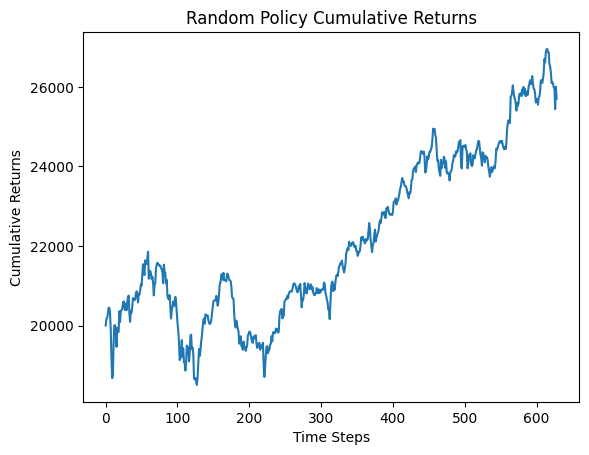

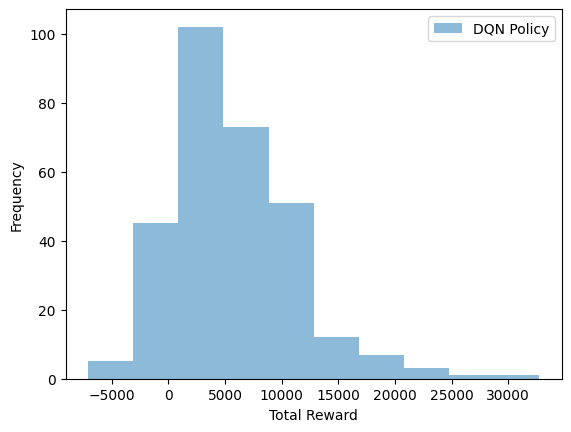

In [8]:
# Evaluate random policy
def random_policy(env, n_episodes=CFG.N_EPISODE):
    """
    Evaluates a random policy in the given environment.

    Args:
    env (MultiStockEnv): The stock trading environment.
    n_episodes (int): Number of episodes to run the evaluation for (default is CFG.N_EPISODE).

    Returns:
    tuple: A tuple containing the total rewards for each episode and the portfolio values for each time step.
    """
    rewards = []
    portfolio_values = []
    for e in range(n_episodes):
        state = env.reset()
        total_reward = 0
        portfolio_value = []
        for time in range(env.n_step - 1):
            action = random.choice(env.action_space)
            next_state, reward, done, info = env.step(action)
            total_reward += reward
            portfolio_value.append(info['cur_val'])
            if done:
                break
        rewards.append(total_reward)
        portfolio_values.append(portfolio_value)
    return rewards, portfolio_values


test_env = MultiStockEnv(test_data)

random_rewards, random_portfolio_values = random_policy(test_env)
print(f"Random Policy Average Reward: {np.mean(random_rewards)}")


plot_cumulative_returns(random_portfolio_values, "Random Policy Cumulative Returns")


# Plot histograms
plt.hist(random_rewards, alpha=0.5, label='DQN Policy')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()





# DQN with Default Settings

episode: 1/300, score: 22849.187299999387
episode: 2/300, score: 19223.626100000318
episode: 3/300, score: 33643.852900000034
episode: 4/300, score: 21182.000599999254
episode: 5/300, score: 34389.9973000015
episode: 6/300, score: 33023.8926000008
episode: 7/300, score: 41258.79240000195
episode: 8/300, score: 39575.72339999935
episode: 9/300, score: 27211.537100000565
episode: 10/300, score: 45814.76270000085
episode: 11/300, score: 31637.284200000184
episode: 12/300, score: 37273.91049999893
episode: 13/300, score: 21982.453000000514
episode: 14/300, score: 25527.35990000239
episode: 15/300, score: 41431.17209999838
episode: 16/300, score: 42747.74610000038
episode: 17/300, score: 35587.92319999944
episode: 18/300, score: 22734.218000000576
episode: 19/300, score: 38927.906699999345
episode: 20/300, score: 30862.884299998892
episode: 21/300, score: 24909.198700000168
episode: 22/300, score: 26873.1879000002
episode: 23/300, score: 27522.256399998976
episode: 24/300, score: 26327.8921

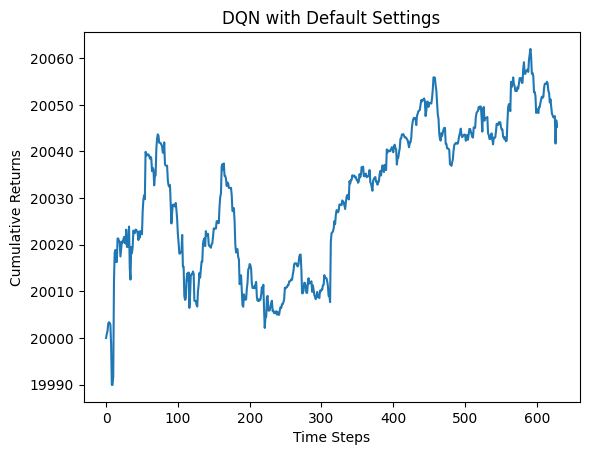

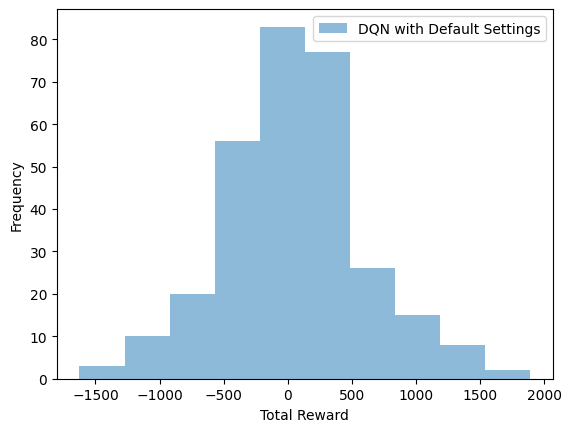

In [9]:
# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


agent = DQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "DQN with Default Settings", train_env, test_env)


# DQN with Modified Network Architecture

episode: 1/300, score: 33102.96179999907
episode: 2/300, score: 34091.54499999997
episode: 3/300, score: 23697.724999999984
episode: 4/300, score: 38508.60499999992
episode: 5/300, score: 34639.4164
episode: 6/300, score: 28141.40499999983
episode: 7/300, score: 35365.64750000001
episode: 8/300, score: 40957.74750000081
episode: 9/300, score: 31340.02000000005
episode: 10/300, score: 21554.449999999975
episode: 11/300, score: 29327.39000000006
episode: 12/300, score: 24328.068599999886
episode: 13/300, score: 22715.355000000036
episode: 14/300, score: 25399.711999999607
episode: 15/300, score: 43644.75600000028
episode: 16/300, score: 26314.24500000008
episode: 17/300, score: 28155.3561999999
episode: 18/300, score: 35307.77000000013
episode: 19/300, score: 38704.86040000012
episode: 20/300, score: 34685.6450000001
episode: 21/300, score: 26340.49000000016
episode: 22/300, score: 26371.435000000194
episode: 23/300, score: 26718.86000000007
episode: 24/300, score: 33090.75399999985
epis

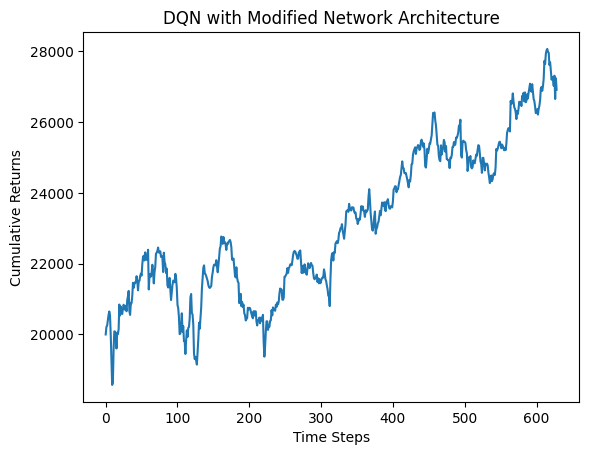

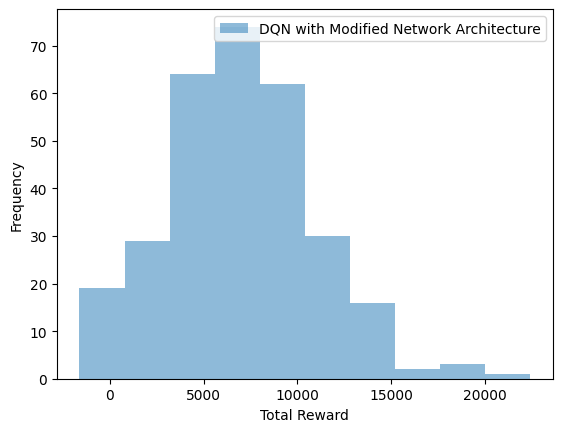

In [10]:
class DQNModified(nn.Module):
    """
    Modified Deep Q Network (DQN) model for the stock trading environment.

    Attributes:
    fc1 (nn.Linear): First fully connected layer.
    fc2 (nn.Linear): Second fully connected layer.
    fc3 (nn.Linear): Third fully connected layer.
    fc4 (nn.Linear): Fourth fully connected layer.
    fc5 (nn.Linear): Fifth fully connected layer (output layer).
    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the DQNModified model.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        
        super(DQNModified, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, action_dim)

    def forward(self, x):
        """
        Performs a forward pass through the network.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        return self.fc5(x)

# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


# Initialize and train the modified DQN agent
agent = DQNAgent(state_dim, action_dim)
agent.model = DQNModified(state_dim, action_dim).to(CFG.DEVICE)
agent.target_model =  DQNModified(state_dim, action_dim).to(CFG.DEVICE)
dqn_pipeline(agent, "DQN with Modified Network Architecture", train_env, test_env)



# DQN with SGD Optimizer

episode: 1/300, score: 19892.937400000086
episode: 2/300, score: 19548.141500000773
episode: 3/300, score: 20247.50000000012
episode: 4/300, score: 20836.395000000266
episode: 5/300, score: 19418.818699999876
episode: 6/300, score: 19763.320000000098
episode: 7/300, score: 19609.63789999987
episode: 8/300, score: 20236.36809999985
episode: 9/300, score: 21555.770000000055
episode: 10/300, score: 20351.404400000298
episode: 11/300, score: 20195.400000000005
episode: 12/300, score: 19967.96169999997
episode: 13/300, score: 19602.48000000008
episode: 14/300, score: 19787.42000000009
episode: 15/300, score: 19678.128199999777
episode: 16/300, score: 20010.799999999974
episode: 17/300, score: 20187.73999999983
episode: 18/300, score: 19903.18739999982
episode: 19/300, score: 20263.000000000196
episode: 20/300, score: 19414.475000000304
episode: 21/300, score: 20808.43269999972
episode: 22/300, score: 19968.8349
episode: 23/300, score: 20103.986299999873
episode: 24/300, score: 18906.5197999

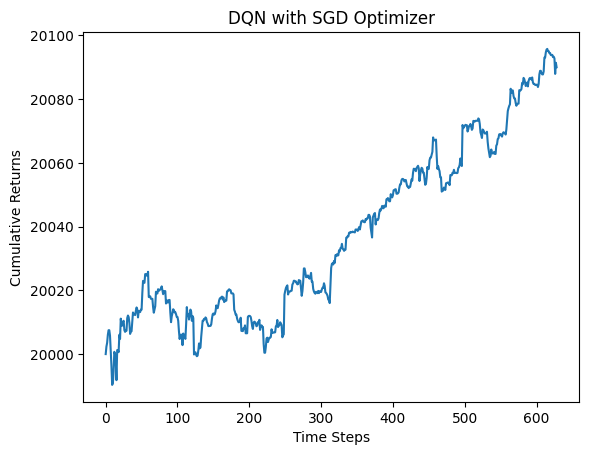

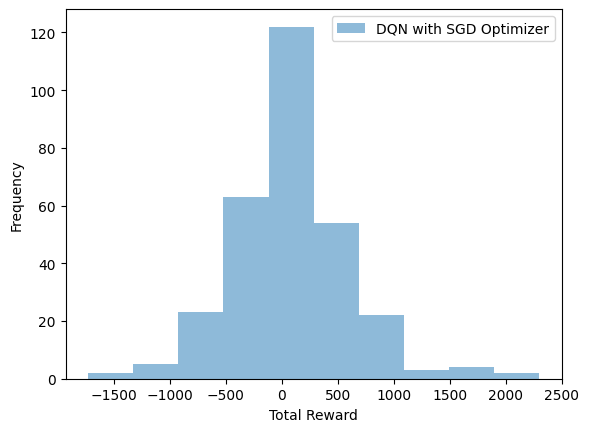

In [11]:

# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


agent = DQNAgent(state_dim, action_dim)
agent.optimizer = optim.SGD(agent.model.parameters(), lr=0.01, momentum=0.9)  

dqn_pipeline(agent, "DQN with SGD Optimizer", train_env, test_env)

# DQN with Different Trade Actions

episode: 1/300, score: 20039.98925
episode: 2/300, score: 20044.427750000003
episode: 3/300, score: 20018.804500000006
episode: 4/300, score: 20035.488999999972
episode: 5/300, score: 20046.356999999975
episode: 6/300, score: 20077.71474999995
episode: 7/300, score: 20104.577499999992
episode: 8/300, score: 20021.394000000022
episode: 9/300, score: 20155.86549999998
episode: 10/300, score: 20037.19875
episode: 11/300, score: 20033.88499999998
episode: 12/300, score: 20044.581499999993
episode: 13/300, score: 20082.393750000017
episode: 14/300, score: 20076.684750000015
episode: 15/300, score: 20166.221500000036
episode: 16/300, score: 20072.423000000013
episode: 17/300, score: 20089.047499999964
episode: 18/300, score: 20189.638999999985
episode: 19/300, score: 20256.772249999947
episode: 20/300, score: 20081.75075000003
episode: 21/300, score: 20076.64199999998
episode: 22/300, score: 20107.731999999985
episode: 23/300, score: 20129.242999999908
episode: 24/300, score: 20272.341499999

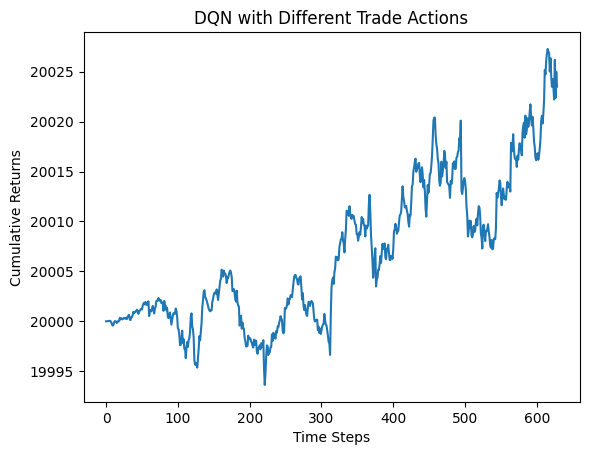

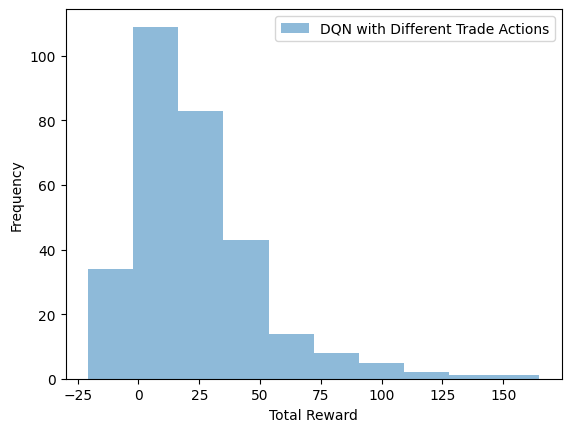

In [12]:
class MultiStockEnvExtended(MultiStockEnv):
    """
    Extended version of MultiStockEnv with additional actions.

    Attributes:
    action_list (list): List of all possible combinations of actions for the stocks.
    """
    def __init__(self, data, initial_investment=CFG.INITIAL_INVESTMENT):
        """
        Initializes the MultiStockEnvExtended.

        Args:
        data (numpy.ndarray): Historical stock price data.
        initial_investment (int): Initial investment amount (default is CFG.INITIAL_INVESTMENT).
        """
        super().__init__(data, initial_investment)
        self.action_list = list(map(list, itertools.product([0, 1, 2, 3], repeat=self.n_stock)))

    def _trade(self, action):
        """
        Executes the trading actions based on the given action index.

        Args:
        action (int): The index of the action to take.
        """
        action_vec = self.action_list[action]
        for i, a in enumerate(action_vec):
            if a == 0:
                self.cash_in_hand += self.stock_price[i] * self.stock_owned[i]
                self.stock_owned[i] = 0
            elif a == 2:
                self.stock_owned[i] += 1
                self.cash_in_hand -= self.stock_price[i]
            elif a == 3:
                self.stock_owned[i] += 0.5
                self.cash_in_hand -= self.stock_price[i] / 2



# Initialize environment with extended actions
train_env = MultiStockEnvExtended(train_data)
test_env = MultiStockEnvExtended(test_data)

# Initialize and train the DQN agent
agent = DQNAgent(state_dim, len(train_env.action_space))
dqn_pipeline(agent, "DQN with Different Trade Actions",train_env,test_env)


# Double DQN (DDQN)

episode: 1/300, score: 21479.569400000368
episode: 2/300, score: 33022.755300000535
episode: 3/300, score: 33509.02350000025
episode: 4/300, score: 36941.816500002475
episode: 5/300, score: 27184.940500000048
episode: 6/300, score: 27756.937600000525
episode: 7/300, score: 35252.26830000237
episode: 8/300, score: 30672.22449999982
episode: 9/300, score: 27191.71000000131
episode: 10/300, score: 39181.16550000015
episode: 11/300, score: 36752.98570000071
episode: 12/300, score: 31937.20010000072
episode: 13/300, score: 45963.73980000096
episode: 14/300, score: 51867.27969999887
episode: 15/300, score: 30612.803500000948
episode: 16/300, score: 44636.60720000082
episode: 17/300, score: 43213.54880000183
episode: 18/300, score: 33992.586000002135
episode: 19/300, score: 40498.11880000059
episode: 20/300, score: 35421.54970000001
episode: 21/300, score: 31653.585199998768
episode: 22/300, score: 28942.638700000185
episode: 23/300, score: 29283.958700000265
episode: 24/300, score: 23082.206

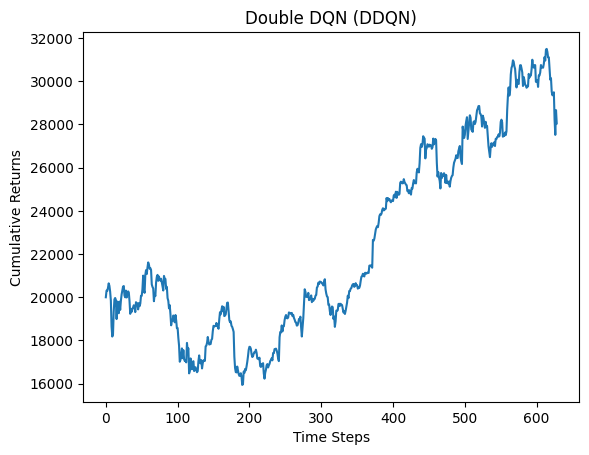

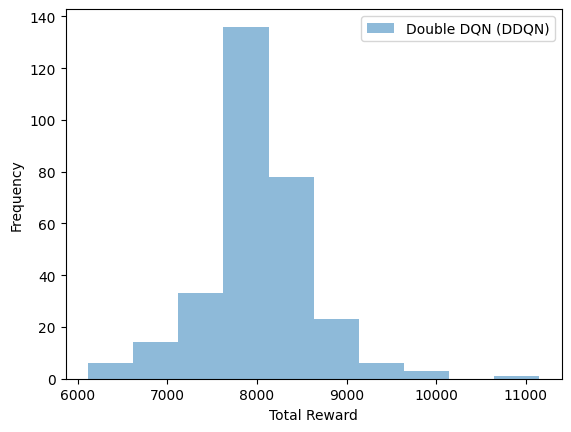

In [13]:
class DoubleDQNAgent(DQNAgent):
    """
    Double Deep Q-learning Network (DQN) agent for the stock trading environment.

    Inherits from:
    DQNAgent

    Overrides:
    replay

    """
    def replay(self, batch_size):
        """
        Performs a replay step of the Double DQN algorithm.

        Args:
        batch_size (int): Size of the mini-batch.
        """
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(CFG.DEVICE)
            target = self.model(state)[0][action]
            if done:
                target = reward
            else:
                t = self.model(next_state).argmax(1).item()
                target = reward + self.gamma * self.target_model(next_state)[0][t]
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = F.mse_loss(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


# Initialize and train the Double DQN agent
agent = DoubleDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Double DQN (DDQN)", train_env, test_env)


In [14]:
CFG.DEVICE

device(type='cpu')

# Prioritized Experience Replay

## class PrioritizedReplayDQNAgent(DQNAgent):
    """
    Prioritized Replay Deep Q-learning Network (DQN) agent for the stock trading environment.

    Inherits from:
    DQNAgent

    Overrides:
    remember
    replay

    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the PrioritizedReplayDQNAgent.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        super().__init__(state_dim, action_dim)
        self.memory = deque(maxlen=10000)
        self.priorities = deque(maxlen=10000)
        self.alpha = 0.6

    def remember(self, state, action, reward, next_state, done):
        """
        Adds a new experience to the memory with maximum priority.

        Args:
        state (numpy.ndarray): Current state.
        action (int): Action taken.
        reward (float): Reward received.
        next_state (numpy.ndarray): Next state.
        done (bool): Whether the episode is done.
        """
        max_priority = max(self.priorities, default=1.0)
        self.memory.append((state, action, reward, next_state, done))
        self.priorities.append(max_priority)

    def replay(self, batch_size):
        """
        Performs a replay step of the Prioritized Replay DQN algorithm.

        Args:
        batch_size (int): Size of the mini-batch.
        """
        sample_indices = self._sample_proportional(batch_size)
        minibatch = [self.memory[idx] for idx in sample_indices]
        weights = [self._calculate_weight(idx) for idx in sample_indices]
        for idx, (state, action, reward, next_state, done) in zip(sample_indices, minibatch):
            state = torch.FloatTensor(state).unsqueeze(0).to(CFG.DEVICE)
            next_state = torch.FloatTensor(next_state).unsqueeze(0).to(CFG.DEVICE)
            target = self.model(state)[0][action]
            if done:
                target = reward
            else:
                t = self.target_model(next_state).max(1)[0].item()
                target = reward + self.gamma * t
            target_f = self.model(state)
            target_f[0][action] = target
            self.optimizer.zero_grad()
            loss = F.mse_loss(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()
            self._update_priority(idx, loss.item())
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def _sample_proportional(self, batch_size):
        """
        Samples a mini-batch of experiences based on their priorities.

        Args:
        batch_size (int): Size of the mini-batch.

        Returns:
        numpy.ndarray: Array of indices of the sampled experiences.
        """
        scaled_priorities = np.array(self.priorities) ** self.alpha
        sample_probabilities = scaled_priorities / sum(scaled_priorities)
        return np.random.choice(len(self.memory), batch_size, p=sample_probabilities)

    def _calculate_weight(self, idx):
        """
        Calculates the importance sampling weight for an experience.

        Args:
        idx (int): Index of the experience.

        Returns:
        float: Importance sampling weight.
        """
        scaled_priorities = np.array(self.priorities) ** self.alpha
        sample_probabilities = scaled_priorities / sum(scaled_priorities)
        weight = (1 / (len(self.memory) * sample_probabilities[idx])) ** (1 - self.epsilon_decay)
        return weight

    def _update_priority(self, idx, priority):
        """
        Updates the priority of an experience in the memory.

        Args:
        idx (int): Index of the experience.
        priority (float): New priority of the experience.
        """

        self.priorities[idx] = priority


# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


# Initialize and train the Prioritized Replay DQN agent
agent = PrioritizedReplayDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Prioritized Experience Replay", train_env, test_env)


# Dueling DQN

episode: 1/300, score: 25970.50739999938
episode: 2/300, score: 17749.177799999994
episode: 3/300, score: 28373.161399999917
episode: 4/300, score: 26200.55420000005
episode: 5/300, score: 29715.74479999949
episode: 6/300, score: 39669.05980000051
episode: 7/300, score: 25144.72560000007
episode: 8/300, score: 22962.449399999576
episode: 9/300, score: 26689.87940000001
episode: 10/300, score: 27582.376600000083
episode: 11/300, score: 23910.35719999995
episode: 12/300, score: 30814.01100000027
episode: 13/300, score: 27741.57440000001
episode: 14/300, score: 25110.62270000004
episode: 15/300, score: 33357.65439999988
episode: 16/300, score: 26219.794400000017
episode: 17/300, score: 26419.109500000228
episode: 18/300, score: 31351.756000000136
episode: 19/300, score: 27741.57440000001
episode: 20/300, score: 25050.45870000028
episode: 21/300, score: 23618.71999999972
episode: 22/300, score: 36456.23819999972
episode: 23/300, score: 31274.405400000367
episode: 24/300, score: 34352.87220

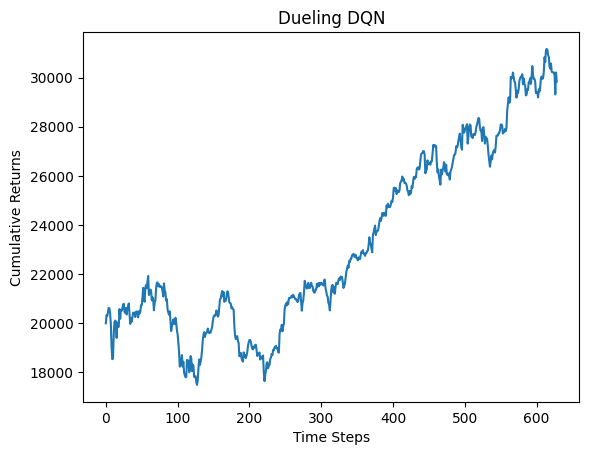

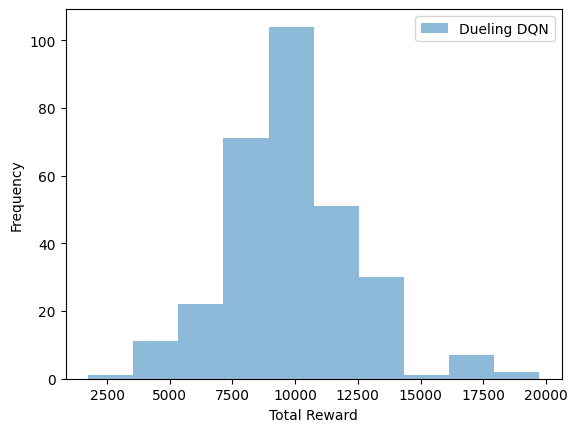

In [16]:
class DuelingDQN(nn.Module):
    """
    Dueling Deep Q Network (DQN) model for the stock trading environment.

    Attributes:
    fc1 (nn.Linear): First fully connected layer.
    fc2 (nn.Linear): Second fully connected layer.
    value_fc (nn.Linear): Fully connected layer for the value stream.
    advantage_fc (nn.Linear): Fully connected layer for the advantage stream.
    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the DuelingDQN model.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.value_fc = nn.Linear(128, 1)
        self.advantage_fc = nn.Linear(128, action_dim)

    def forward(self, x):
        """
        Performs a forward pass through the network.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor.
        """
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        value = self.value_fc(x)
        advantage = self.advantage_fc(x)
        return value + (advantage - advantage.mean())


# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)


# Initialize and train the Dueling DQN agent
agent = DQNAgent(state_dim, action_dim)
agent.model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
agent.target_model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
dqn_pipeline(agent, "Dueling DQN", train_env, test_env)


# Multi-Agent DQN

episode: 1/300, score: 21644.862400001344
episode: 2/300, score: 27543.075100001915
episode: 3/300, score: 37292.069699997766
episode: 4/300, score: 35607.86460000004
episode: 5/300, score: 29231.9753999991
episode: 6/300, score: 29283.837200001286
episode: 7/300, score: 24627.455299999194
episode: 8/300, score: 23704.393700002343
episode: 9/300, score: 20744.549600000108
episode: 10/300, score: 25059.713800000645
episode: 11/300, score: 16937.827900000157
episode: 12/300, score: 25189.220899999746
episode: 13/300, score: 22082.88089999988
episode: 14/300, score: 24137.661200000934
episode: 15/300, score: 19578.94999999888
episode: 16/300, score: 27355.563100001054
episode: 17/300, score: 41156.84790000115
episode: 18/300, score: 37911.26790000064
episode: 19/300, score: 26253.873799999663
episode: 20/300, score: 36165.06439999939
episode: 21/300, score: 38636.814599998856
episode: 22/300, score: 51368.010099999854
episode: 23/300, score: 39167.36629999993
episode: 24/300, score: 33814

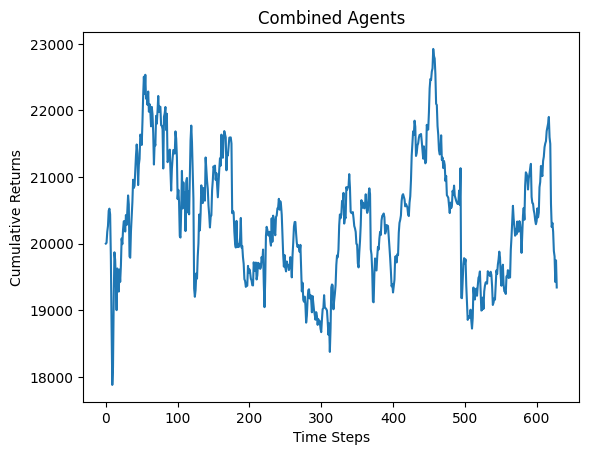

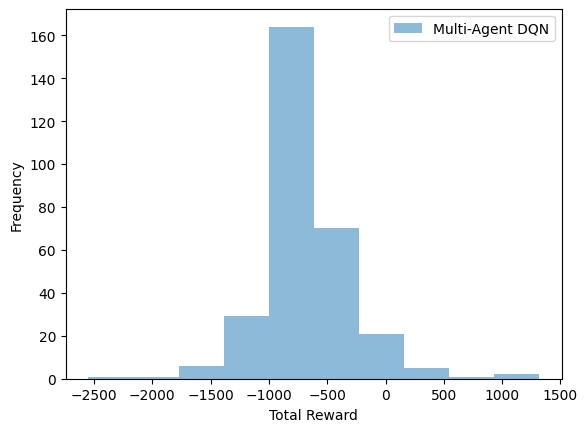

In [17]:
class MultiAgentDQN:
    """
    Multi-Agent Deep Q-learning Network (DQN) for the stock trading environment.

    Attributes:
    env (MultiStockEnv): The stock trading environment.
    agents (list): List of DQNAgent instances for each stock.
    """
    def __init__(self, env):
        """
        Initializes the MultiAgentDQN.

        Args:
        env (MultiStockEnv): The stock trading environment.
        """

        self.env = env
        self.agents = [DQNAgent(env.state_dim, len(env.action_space)) for _ in range(env.n_stock)]

    def train(self):
        """
        Trains the agents using the multi-agent DQN approach.
        """
        for e in range(CFG.N_EPISODE):
            state = self.env.reset()
            for time in range(self.env.n_step - 1):
                actions = [agent.act(state) for agent in self.agents]
                combined_action = max(set(actions), key=actions.count)  # Use majority vote
                next_state, reward, done, _ = self.env.step(combined_action)
                for agent in self.agents:
                    agent.remember(state, combined_action, reward, next_state, done)
                state = next_state
                if done:
                    for agent in self.agents:
                        agent.update_target_model()
                    print(f"episode: {e+1}/{CFG.N_EPISODE}, score: {self.env._get_val()}")
                    break
                if all(len(agent.memory) > CFG.BATCH_SIZE for agent in self.agents):
                    for agent in self.agents:
                        agent.replay(CFG.BATCH_SIZE)


    def test(self, test_env):
        """
        Tests the trained agents in a test environment.

        Args:
        test_env (MultiStockEnv): The test environment.
        """
        combined_actions = []
        state = test_env.reset()
        for time in range(test_env.n_step - 1):
            actions = [agent.act(state) for agent in self.agents]
            combined_action = max(set(actions), key=actions.count)  # Use majority vote
            next_state, reward, done, _ = test_env.step(combined_action)
            state = next_state
            if done:
                break
        combined_actions.append(combined_action)
    
        combined_rewards, combined_portfolio_values = self.evaluate_policy(test_env, self.agents, combined_actions)
        print(f"Combined Agents Average Reward: {np.mean(combined_rewards)}")
        self.plot_cumulative_returns(combined_portfolio_values, "Combined Agents")
        plt.hist(combined_rewards, alpha=0.5, label="Multi-Agent DQN")
        plt.xlabel('Total Reward')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.show()

    def evaluate_policy(self, env, agents, combined_actions, n_episodes=CFG.N_EPISODE):
        """
        Evaluates the policy of the agents over a number of episodes in the given environment.

        Args:
        env (MultiStockEnv): The stock trading environment.
        agents (list): List of DQNAgent instances for each stock.
        combined_actions (list): List of combined actions for each time step.
        n_episodes (int): Number of episodes to run the evaluation for (default is CFG.N_EPISODE).

        Returns:
        tuple: A tuple containing the total rewards for each episode and the portfolio values for each time step.
        """
        rewards = []
        portfolio_values = []
        for e in range(n_episodes):
            state = env.reset()
            total_reward = 0
            portfolio_value = []
            for time in range(env.n_step - 1):
                action = agents[0].act(state)  # Using the first agent, change if you want to use all
                next_state, reward, done, info = env.step(action)
                total_reward += reward
                portfolio_value.append(info['cur_val'])
                if done:
                    break
            rewards.append(total_reward)
            portfolio_values.append(portfolio_value)
        return rewards, portfolio_values

    def plot_cumulative_returns(self, portfolio_values, title="Multi-Agent DQN"):
        """
        Plots the mean cumulative returns over time steps.

        Args:
        portfolio_values (list): List of lists containing portfolio values for each episode.
        title (str): Title of the plot.
        """
        mean_cumulative_returns = np.mean(portfolio_values, axis=0)
        plt.plot(mean_cumulative_returns)
        plt.title(title)
        plt.xlabel('Time Steps')
        plt.ylabel('Cumulative Returns')
        plt.show()

# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)

# Initialize and train the Multi-Agent DQN system
multi_agent_dqn = MultiAgentDQN(train_env)
multi_agent_dqn.train()

# Test the trained agents on the test environment
multi_agent_dqn.test(test_env)


# Enhancing Exploration with Noisy Networks

episode: 1/300, score: 33305.25359999976
episode: 2/300, score: 34310.20160000005
episode: 3/300, score: 32827.996400000025
episode: 4/300, score: 33335.19259999981
episode: 5/300, score: 33295.64759999979
episode: 6/300, score: 33277.21010000031
episode: 7/300, score: 33871.590099999754
episode: 8/300, score: 33391.64760000062
episode: 9/300, score: 34132.843200000374
episode: 10/300, score: 35616.39280000111
episode: 11/300, score: 33108.12870000009
episode: 12/300, score: 34114.16460000003
episode: 13/300, score: 33512.73760000013
episode: 14/300, score: 31442.816199999925
episode: 15/300, score: 35262.5620000011
episode: 16/300, score: 33737.7026
episode: 17/300, score: 35762.9122
episode: 18/300, score: 35158.26900000012
episode: 19/300, score: 34024.742599999816
episode: 20/300, score: 34247.210499999426
episode: 21/300, score: 32538.47719999976
episode: 22/300, score: 34562.34690000009
episode: 23/300, score: 32839.51250000004
episode: 24/300, score: 35492.57770000013
episode: 2

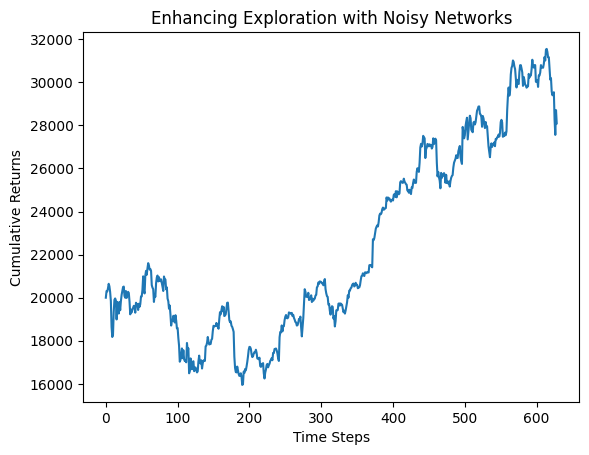

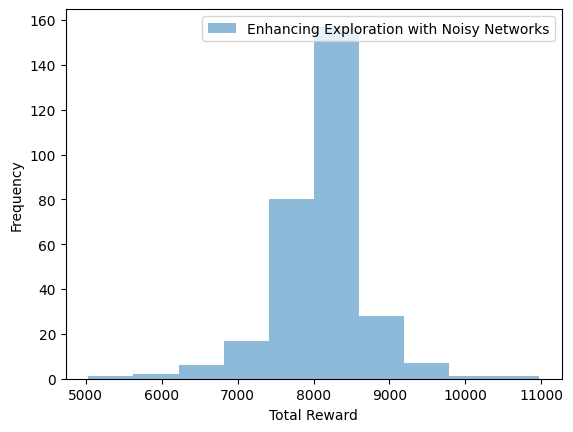

In [18]:
class NoisyLinear(nn.Module):
    """
    Noisy Linear layer for adding noise to the weights during training.

    Attributes:
    in_features (int): Number of input features.
    out_features (int): Number of output features.
    std_init (float): Initial standard deviation for the noise (default is 0.5).
    weight_mu (nn.Parameter): Mean weight parameter.
    weight_sigma (nn.Parameter): Standard deviation weight parameter.
    weight_epsilon (torch.Tensor): Noise tensor for weights.
    bias_mu (nn.Parameter): Mean bias parameter.
    bias_sigma (nn.Parameter): Standard deviation bias parameter.
    bias_epsilon (torch.Tensor): Noise tensor for biases.
    """
    def __init__(self, in_features, out_features, std_init=0.5):
        """
        Initializes the NoisyLinear layer.

        Args:
        in_features (int): Number of input features.
        out_features (int): Number of output features.
        std_init (float): Initial standard deviation for the noise (default is 0.5).
        """
        super(NoisyLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.std_init = std_init
        self.weight_mu = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.weight_sigma = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.register_buffer('weight_epsilon', torch.FloatTensor(out_features, in_features))
        self.bias_mu = nn.Parameter(torch.FloatTensor(out_features))
        self.bias_sigma = nn.Parameter(torch.FloatTensor(out_features))
        self.register_buffer('bias_epsilon', torch.FloatTensor(out_features))
        self.reset_parameters()
        self.reset_noise()

    def reset_parameters(self):
        """
        Resets the weight and bias parameters.
        """
        mu_range = 1 / np.sqrt(self.in_features)
        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(self.std_init / np.sqrt(self.in_features))
        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(self.std_init / np.sqrt(self.in_features))

    def reset_noise(self):
        """
        Resets the noise tensors.
        """

        self.weight_epsilon.normal_()
        self.bias_epsilon.normal_()

    def forward(self, x):
        """
        Performs a forward pass through the layer.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor.
        """
        if self.training:
            weight = self.weight_mu + self.weight_sigma * self.weight_epsilon
            bias = self.bias_mu + self.bias_sigma * self.bias_epsilon
        else:
            weight = self.weight_mu
            bias = self.bias_mu
        return F.linear(x, weight, bias)

class NoisyDQN(nn.Module):
    """
    Noisy Deep Q Network (DQN) model for the stock trading environment.

    Attributes:
    fc1 (nn.Linear): First fully connected layer.
    fc2 (NoisyLinear): Noisy fully connected layer.
    fc3 (NoisyLinear): Noisy fully connected layer.
    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the NoisyDQN model.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        super(NoisyDQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = NoisyLinear(128, 128)
        self.fc3 = NoisyLinear(128, action_dim)

    def forward(self, x):
        """
        Performs a forward pass through the network.

        Args:
        x (torch.Tensor): Input tensor.

        Returns:
        torch.Tensor: Output tensor.
        """

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)



# Initialize and train the Noisy DQN agent
agent = DQNAgent(state_dim, action_dim)
agent.model = NoisyDQN(state_dim, action_dim).to(CFG.DEVICE)
agent.target_model = NoisyDQN(state_dim, action_dim).to(CFG.DEVICE)
dqn_pipeline(agent, "Enhancing Exploration with Noisy Networks", train_env, test_env)


# Combining Approaches

episode: 1/300, score: 28602.365799999225
episode: 2/300, score: 52074.339099998855
episode: 3/300, score: 40815.52500000032
episode: 4/300, score: 40740.56000000016
episode: 5/300, score: 40306.49500000034
episode: 6/300, score: 40841.43000000025
episode: 7/300, score: 40740.56000000016
episode: 8/300, score: 41952.73650000005
episode: 9/300, score: 40911.98460000015
episode: 10/300, score: 44635.442399999956
episode: 11/300, score: 42387.490000000944
episode: 12/300, score: 30169.85000000098
episode: 13/300, score: 30598.759999999995
episode: 14/300, score: 40687.96000000041
episode: 15/300, score: 39430.72249999977
episode: 16/300, score: 40588.37500000011
episode: 17/300, score: 39701.41999999996
episode: 18/300, score: 41152.43319999959
episode: 19/300, score: 33693.86
episode: 20/300, score: 31664.216300000382
episode: 21/300, score: 46649.02690000039
episode: 22/300, score: 40332.964999999815
episode: 23/300, score: 35966.63840000008
episode: 24/300, score: 40802.68500000107
epi

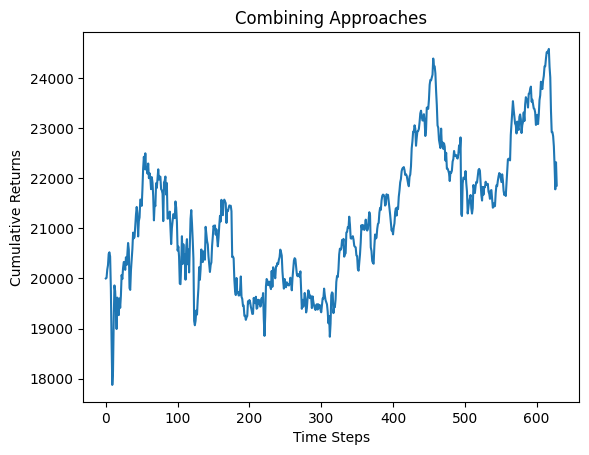

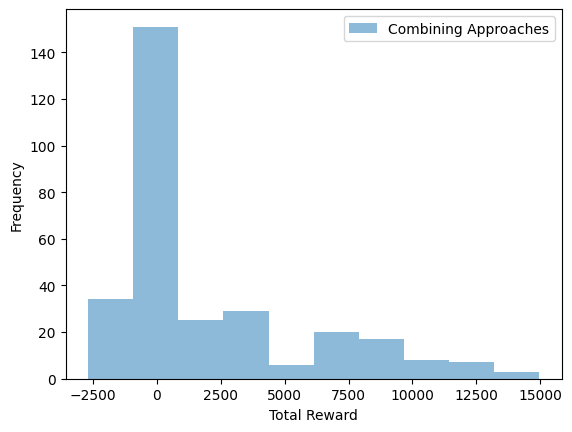

In [19]:
# Initialize and train the combined agent
class CombinedDQNAgent(PrioritizedReplayDQNAgent):
    """
    Combined DQN Agent using prioritized replay for the stock trading environment.

    Attributes:
    model (DuelingDQN): Dueling DQN model.
    target_model (DuelingDQN): Target Dueling DQN model.
    """
    def __init__(self, state_dim, action_dim):
        """
        Initializes the CombinedDQNAgent.

        Args:
        state_dim (int): Dimension of the state space.
        action_dim (int): Dimension of the action space.
        """
        super().__init__(state_dim, action_dim)
        self.model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
        self.target_model = DuelingDQN(state_dim, action_dim).to(CFG.DEVICE)
        self.update_target_model()


# Initialize the environment and agent for training
train_env = MultiStockEnv(train_data)
state_dim = train_env.state_dim
action_dim = len(train_env.action_space)

# Initialize the test environment
test_env = MultiStockEnv(test_data)
agent = CombinedDQNAgent(state_dim, action_dim)
dqn_pipeline(agent, "Combining Approaches", train_env, test_env)
